In [1]:
%load_ext autoreload
%autoreload 2

In [37]:
import matplotlib.pyplot as plt
from datasets import CassetteDataset
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import os
import time

root_folder = os.path.dirname(os.getcwd())
figure_folder = os.path.join(root_folder, 'Figures')
root_folder


'c:\\Users\\INES\\Documents\\3A_MVA\\NPM3D\\npm3d-project'

Feature importance indicates how much a feature contribute to a model prediction. It somehow quantifies the usefulness of a variable for a given model and prediction. 

In [60]:
method = 'DEFAULT'

dataset = CassetteDataset(num_per_class=1000,
                          data_folder=f"{root_folder}/__data",
                          method=method)
classifier = RandomForestClassifier(n_estimators=150,
                                    criterion="gini",
                                    class_weight="balanced"
                                    ) 
training_features_DEFAULT, training_labels, val_features_DEFAULT, val_labels = dataset.get_training_data()
classifier.fit(training_features_DEFAULT, training_labels)


voxel size 0.2


Subsampling cloud: 100%|██████████| 419879/419879 [01:57<00:00, 3588.23it/s]


voxel size 0.4


Subsampling cloud: 100%|██████████| 127586/127586 [01:57<00:00, 1083.14it/s]
c:\Users\INES\Documents\3A_MVA\NPM3D\npm3d-project\Code\multiscale_features.py:147: RuntimeWarning: invalid value encountered in log
  eigenentropy = -np.sum(all_eigenvalues * np.log(all_eigenvalues + eps), axis=1)


voxel size 0.8


Subsampling cloud: 100%|██████████| 35800/35800 [00:51<00:00, 696.50it/s] 


RandomForestClassifier(class_weight='balanced', n_estimators=150)

In [50]:
methodwH = 'W_HEIGHT_FEAT'

dataset = CassetteDataset(num_per_class=1000,
                          data_folder=f"{root_folder}/__data",
                          method=methodwH)
classifier_w_height_feat = RandomForestClassifier(n_estimators=150,
                                    criterion="gini",
                                    class_weight="balanced"
                                    ) 
training_features, training_labels, val_features, val_labels = dataset.get_training_data()
classifier_w_height_feat.fit(training_features, training_labels)


voxel size 0.2


Subsampling cloud: 100%|██████████| 419879/419879 [01:46<00:00, 3948.97it/s]


voxel size 0.4


Subsampling cloud: 100%|██████████| 127586/127586 [01:54<00:00, 1109.45it/s]
c:\Users\INES\Documents\3A_MVA\NPM3D\npm3d-project\Code\multiscale_features.py:147: RuntimeWarning: invalid value encountered in log
  eigenentropy = -np.sum(all_eigenvalues * np.log(all_eigenvalues + eps), axis=1)


voxel size 0.8


Subsampling cloud: 100%|██████████| 35800/35800 [01:09<00:00, 517.12it/s]


RandomForestClassifier(class_weight='balanced', n_estimators=150)

In [52]:
from sklearn.metrics import jaccard_score

# print(f'accuracy DEFAULT: {classifier.score(val_features_DEFAULT, val_labels)}')
print(f'accuracy W_HEIGHT_FEAT: {classifier_w_height_feat.score(val_features, val_labels)}')
val_pred_w_height_feat = classifier_w_height_feat.predict(val_features)
print(f"class score {jaccard_score(val_labels, val_pred_w_height_feat, average=None)}")
print(f"weight IoU {jaccard_score(val_labels, val_pred_w_height_feat, average='weighted')}")

accuracy W_HEIGHT_FEAT: 0.8801652892561983
class score [0.75438596 0.7443609  1.         0.91133005 0.51724138 0.80737705
 0.98507463]
weight IoU 0.7883917308736111


In [20]:
feature_names = ['Sum eigenvalues',
                    'omnivariance',
                    'eigenentropy',
                    'linearity',
                    'planarity',
                    'sphericity',
                    'change curvature',
                    'verticality smallest',
                    'verticality largest',
                    '1st Ord moment $e_3$',
                    '1st Ord $\mathcal{M}$ $e_2$',
                    '1st Ord $\mathcal{M}$ $e_1$',
                    '2nd Ord $\mathcal{M}$ $e_3$',
                    '2nd Ord $\mathcal{M}$ $e_2$',
                    '2nd Ord $\mathcal{M}$ $e_1$',
                    '1st Ord $\mathcal{M}$ $e_z$',
                    '2nd Ord $\mathcal{M}$ $e_z$',
                    'Neighborhood size',
                    'Vertical range',
                    'Height below',
                    'height above'
                    ]

## Decision tree feature importance

Mean decrease in impurity Model dependent feature importance measure

In [69]:
def plot_importance(method, importances, 
                        imp_std,
                        n_feats:int=18,
                        permutation: bool = False):
    impurity_importances_scale0 = pd.Series(importances[:n_feats])
    impurity_importances_scale1 = pd.Series(importances[n_feats:n_feats*2])
    impurity_importances_scale2 = pd.Series(importances[n_feats*2:n_feats*3], index=feature_names[:n_feats])
    impurity_importances_scale3 = pd.Series(importances[n_feats*3:n_feats*4], index=feature_names[:n_feats])

    fig = plt.figure(figsize=(30, 20))

    ax = fig.add_subplot(2, 2, 1)
    impurity_importances_scale0.plot.bar(yerr=imp_std[:n_feats], ax=ax, xticks=[])
    ax.set_title('Scale 0', fontsize=20)
    ax.set_ylabel('Mean decrease in impurity')

    ax = fig.add_subplot(2, 2, 2)
    impurity_importances_scale1.plot.bar(yerr=imp_std[n_feats:n_feats*2], ax=ax, xticks=[])
    ax.set_title('Scale 1 ', fontsize=20)
    ax.set_ylabel('Mean decrease in impurity')

    ax = fig.add_subplot(2, 2, 3)
    impurity_importances_scale2.plot.bar(yerr=imp_std[n_feats*2:n_feats*3], ax=ax, fontsize=15, rot=60)
    ax.set_title('Scale 2 ', fontsize=20)
    ax.set_ylabel('Mean decrease in impurity')

    ax = fig.add_subplot(2, 2, 4)
    impurity_importances_scale3.plot.bar(yerr=imp_std[n_feats*3:n_feats*4], ax=ax, fontsize=15, rot=60)
    ax.set_title('Scale 3 ', fontsize=20)
    ax.set_ylabel('Mean decrease in impurity')

    # fig.tight_layout()
    fig.savefig(f"{figure_folder}/{'permutation' if permutation else 'MDI'}_feature_importances_{method}.png")



Time to compute feature importances: 0.03 seconds


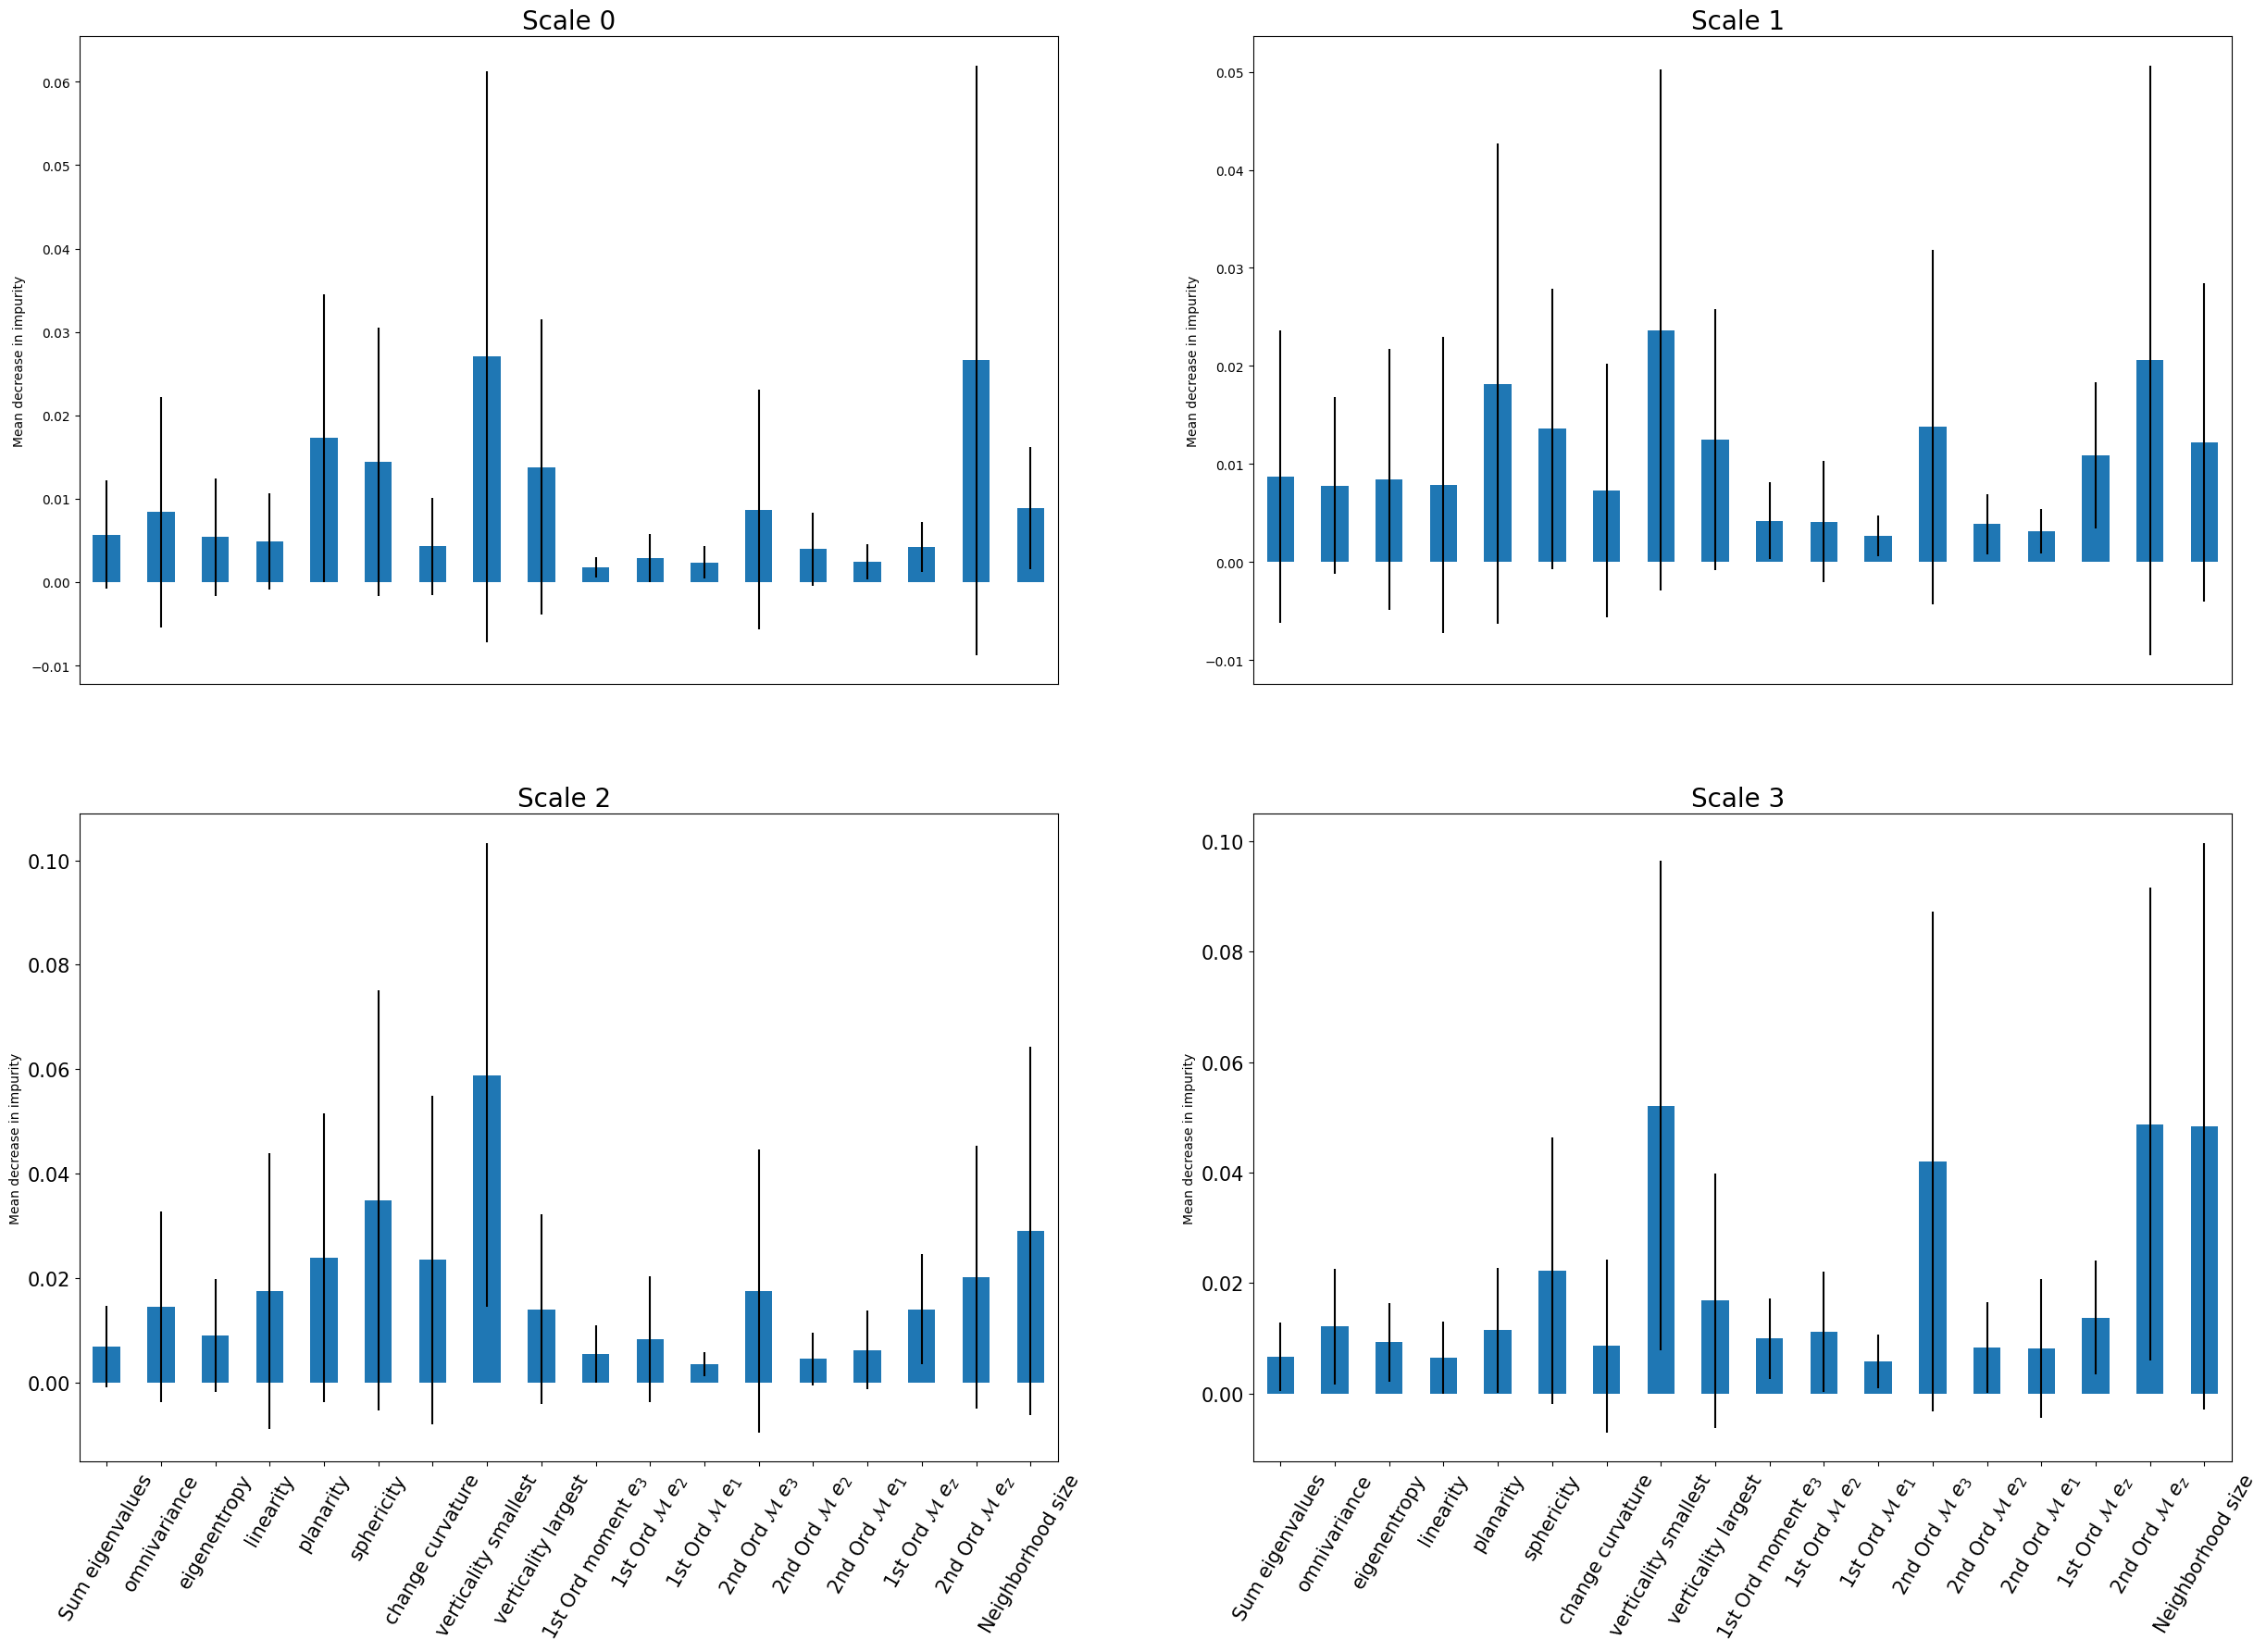

In [70]:
time0 = time.time()
importances = classifier.feature_importances_
imp_std = np.std( [tree.feature_importances_ for tree in classifier.estimators_], axis=0)
time1 = time.time()

print(f"Time to compute feature importances: {time1-time0:.2f} seconds")
plot_importance('DEFAULT', importances, imp_std)

Time to compute feature importances: 0.06 seconds


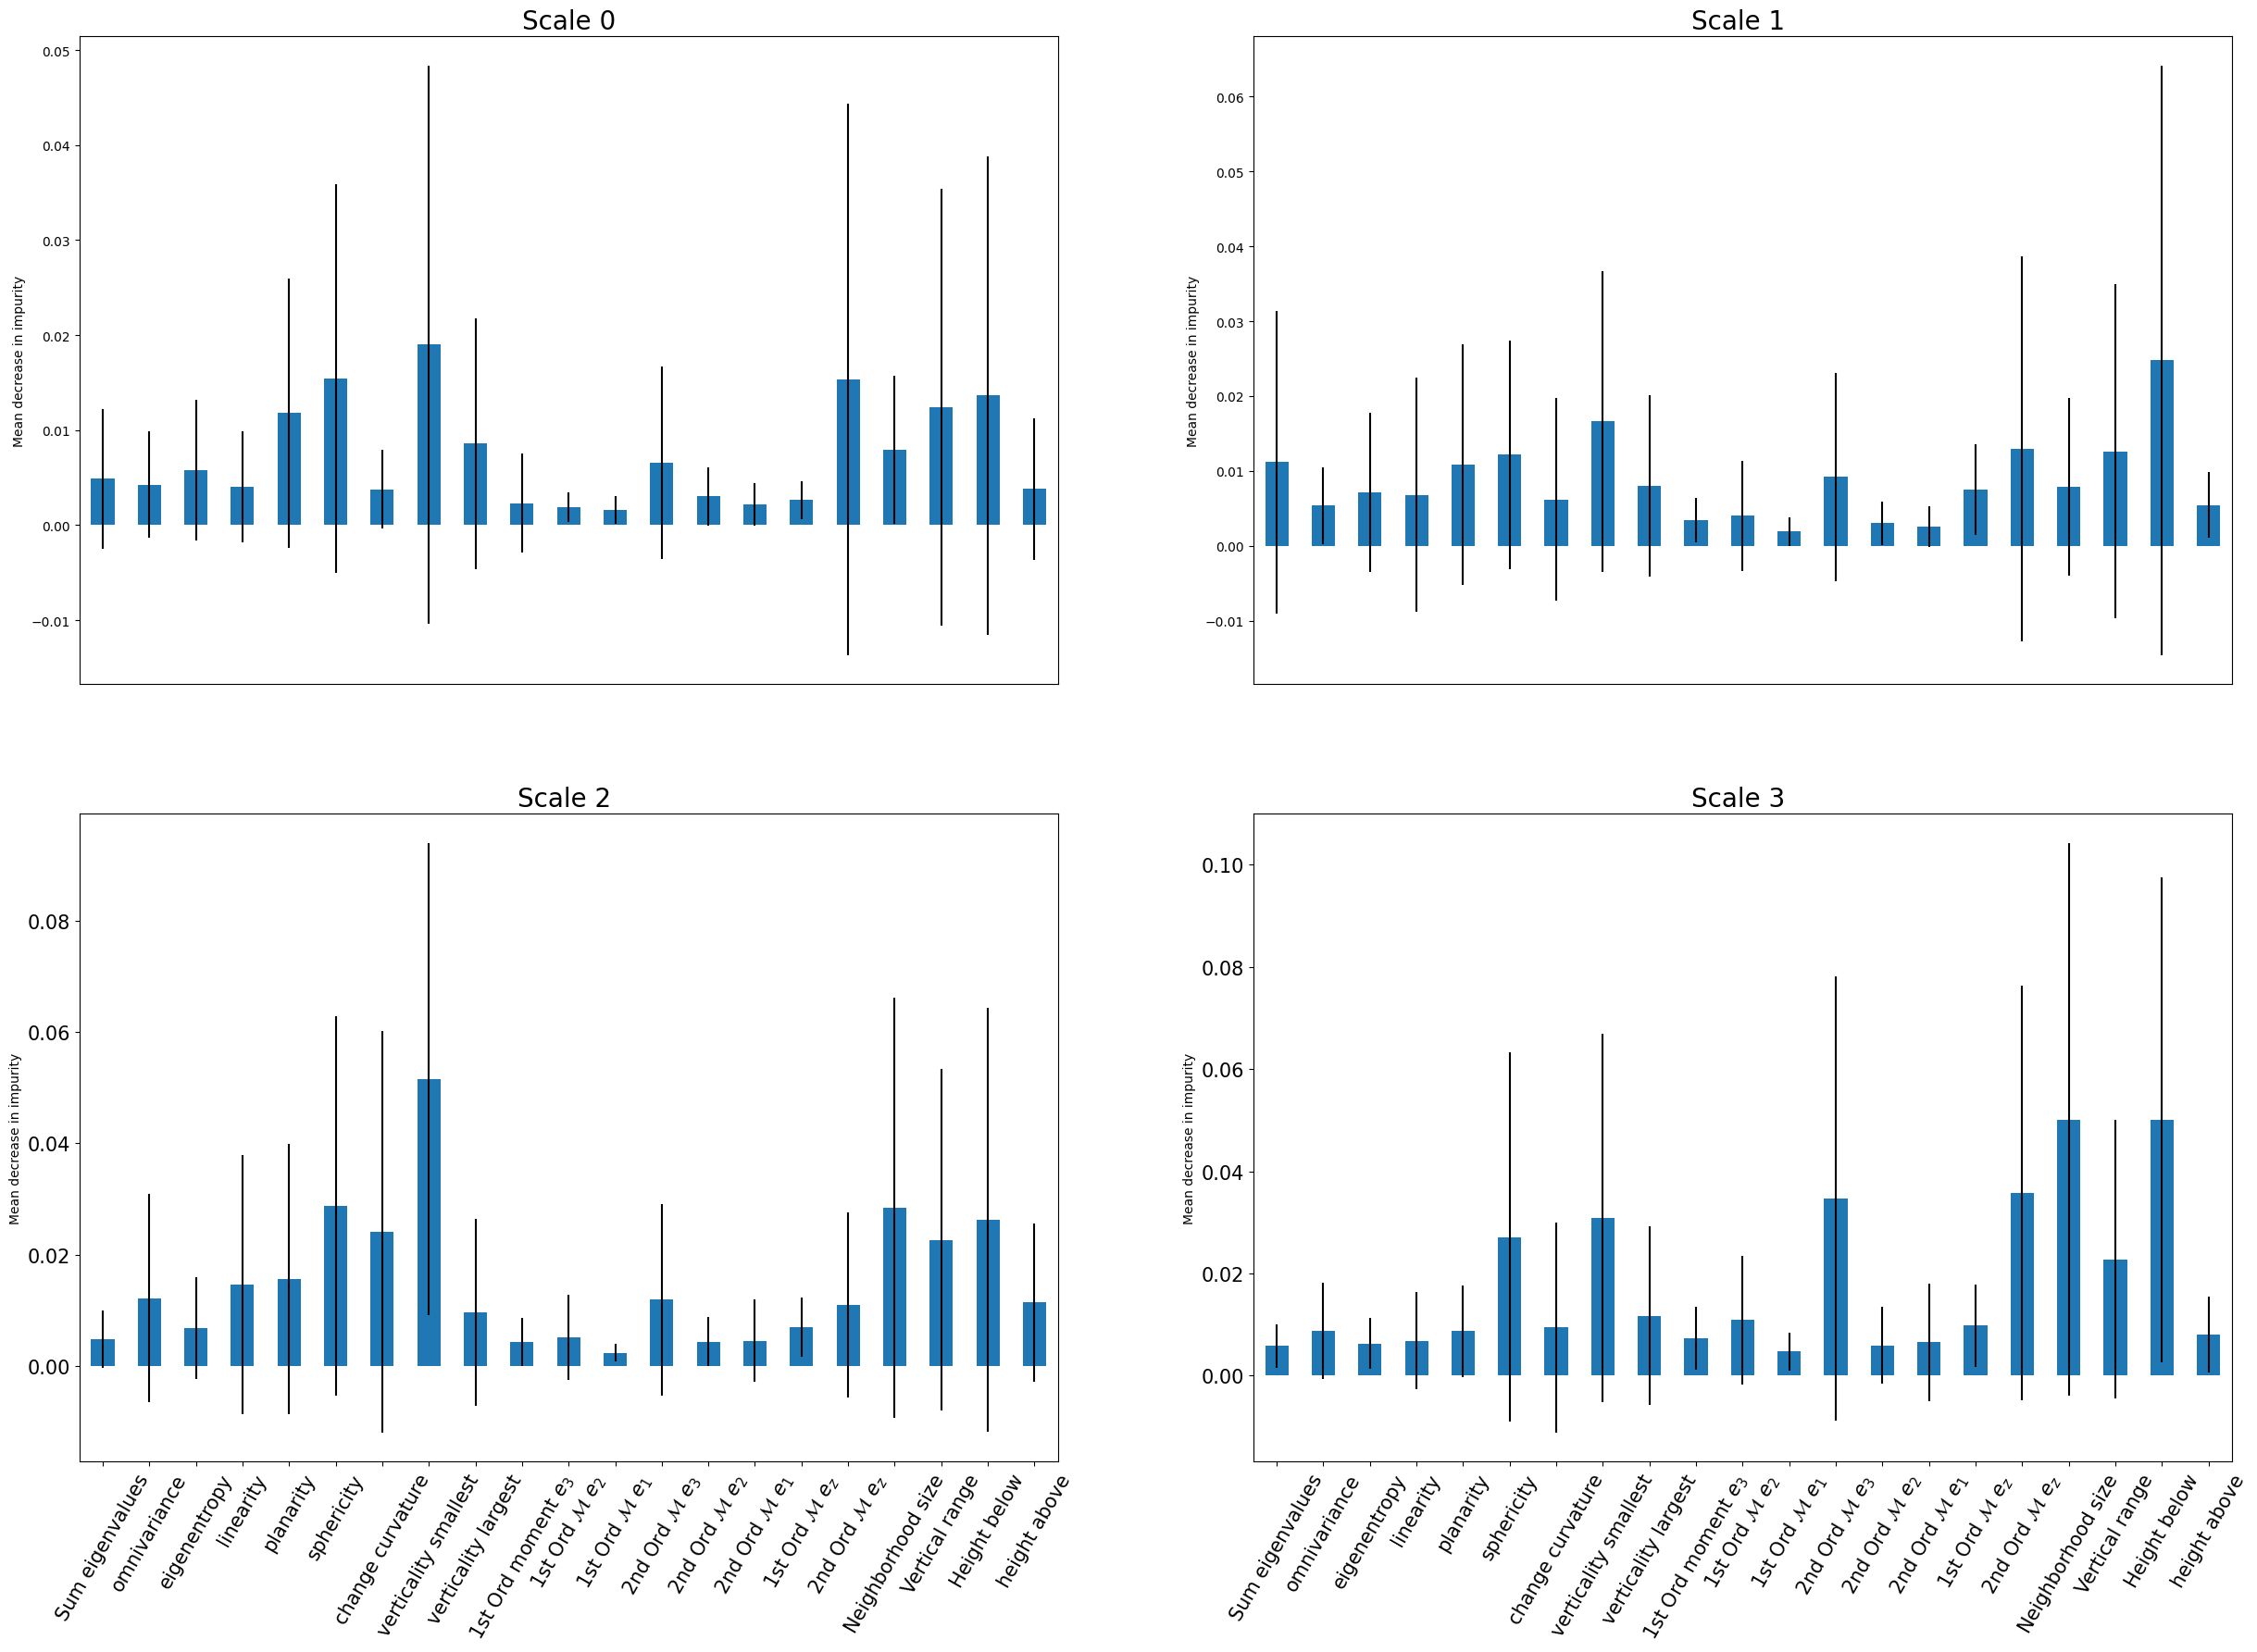

In [71]:
methodwH = 'W_HEIGHT_FEAT'
time0 = time.time()
importances = classifier_w_height_feat.feature_importances_
imp_std = np.std( [tree.feature_importances_ for tree in classifier_w_height_feat.estimators_], axis=0)
time1 = time.time()

print(f"Time to compute feature importances: {time1-time0:.2f} seconds")
plot_importance(methodwH, importances, imp_std, n_feats=21)

## Permutation feature importance


Permutation feature importance is a model agnostic feature importance mehtod and is a commonly used technique. The idea is to assess how much the model's performance changes when modifying the value of the given feature. It is done by shuffling the values of the variable and observe the difference of the prediction accuracy.
Unlike the previous method, this approach is not biased by high-cardinality features.


In [59]:
from sklearn.inspection import permutation_importance

Time to compute permutation importances: 14.82 seconds
(72,)


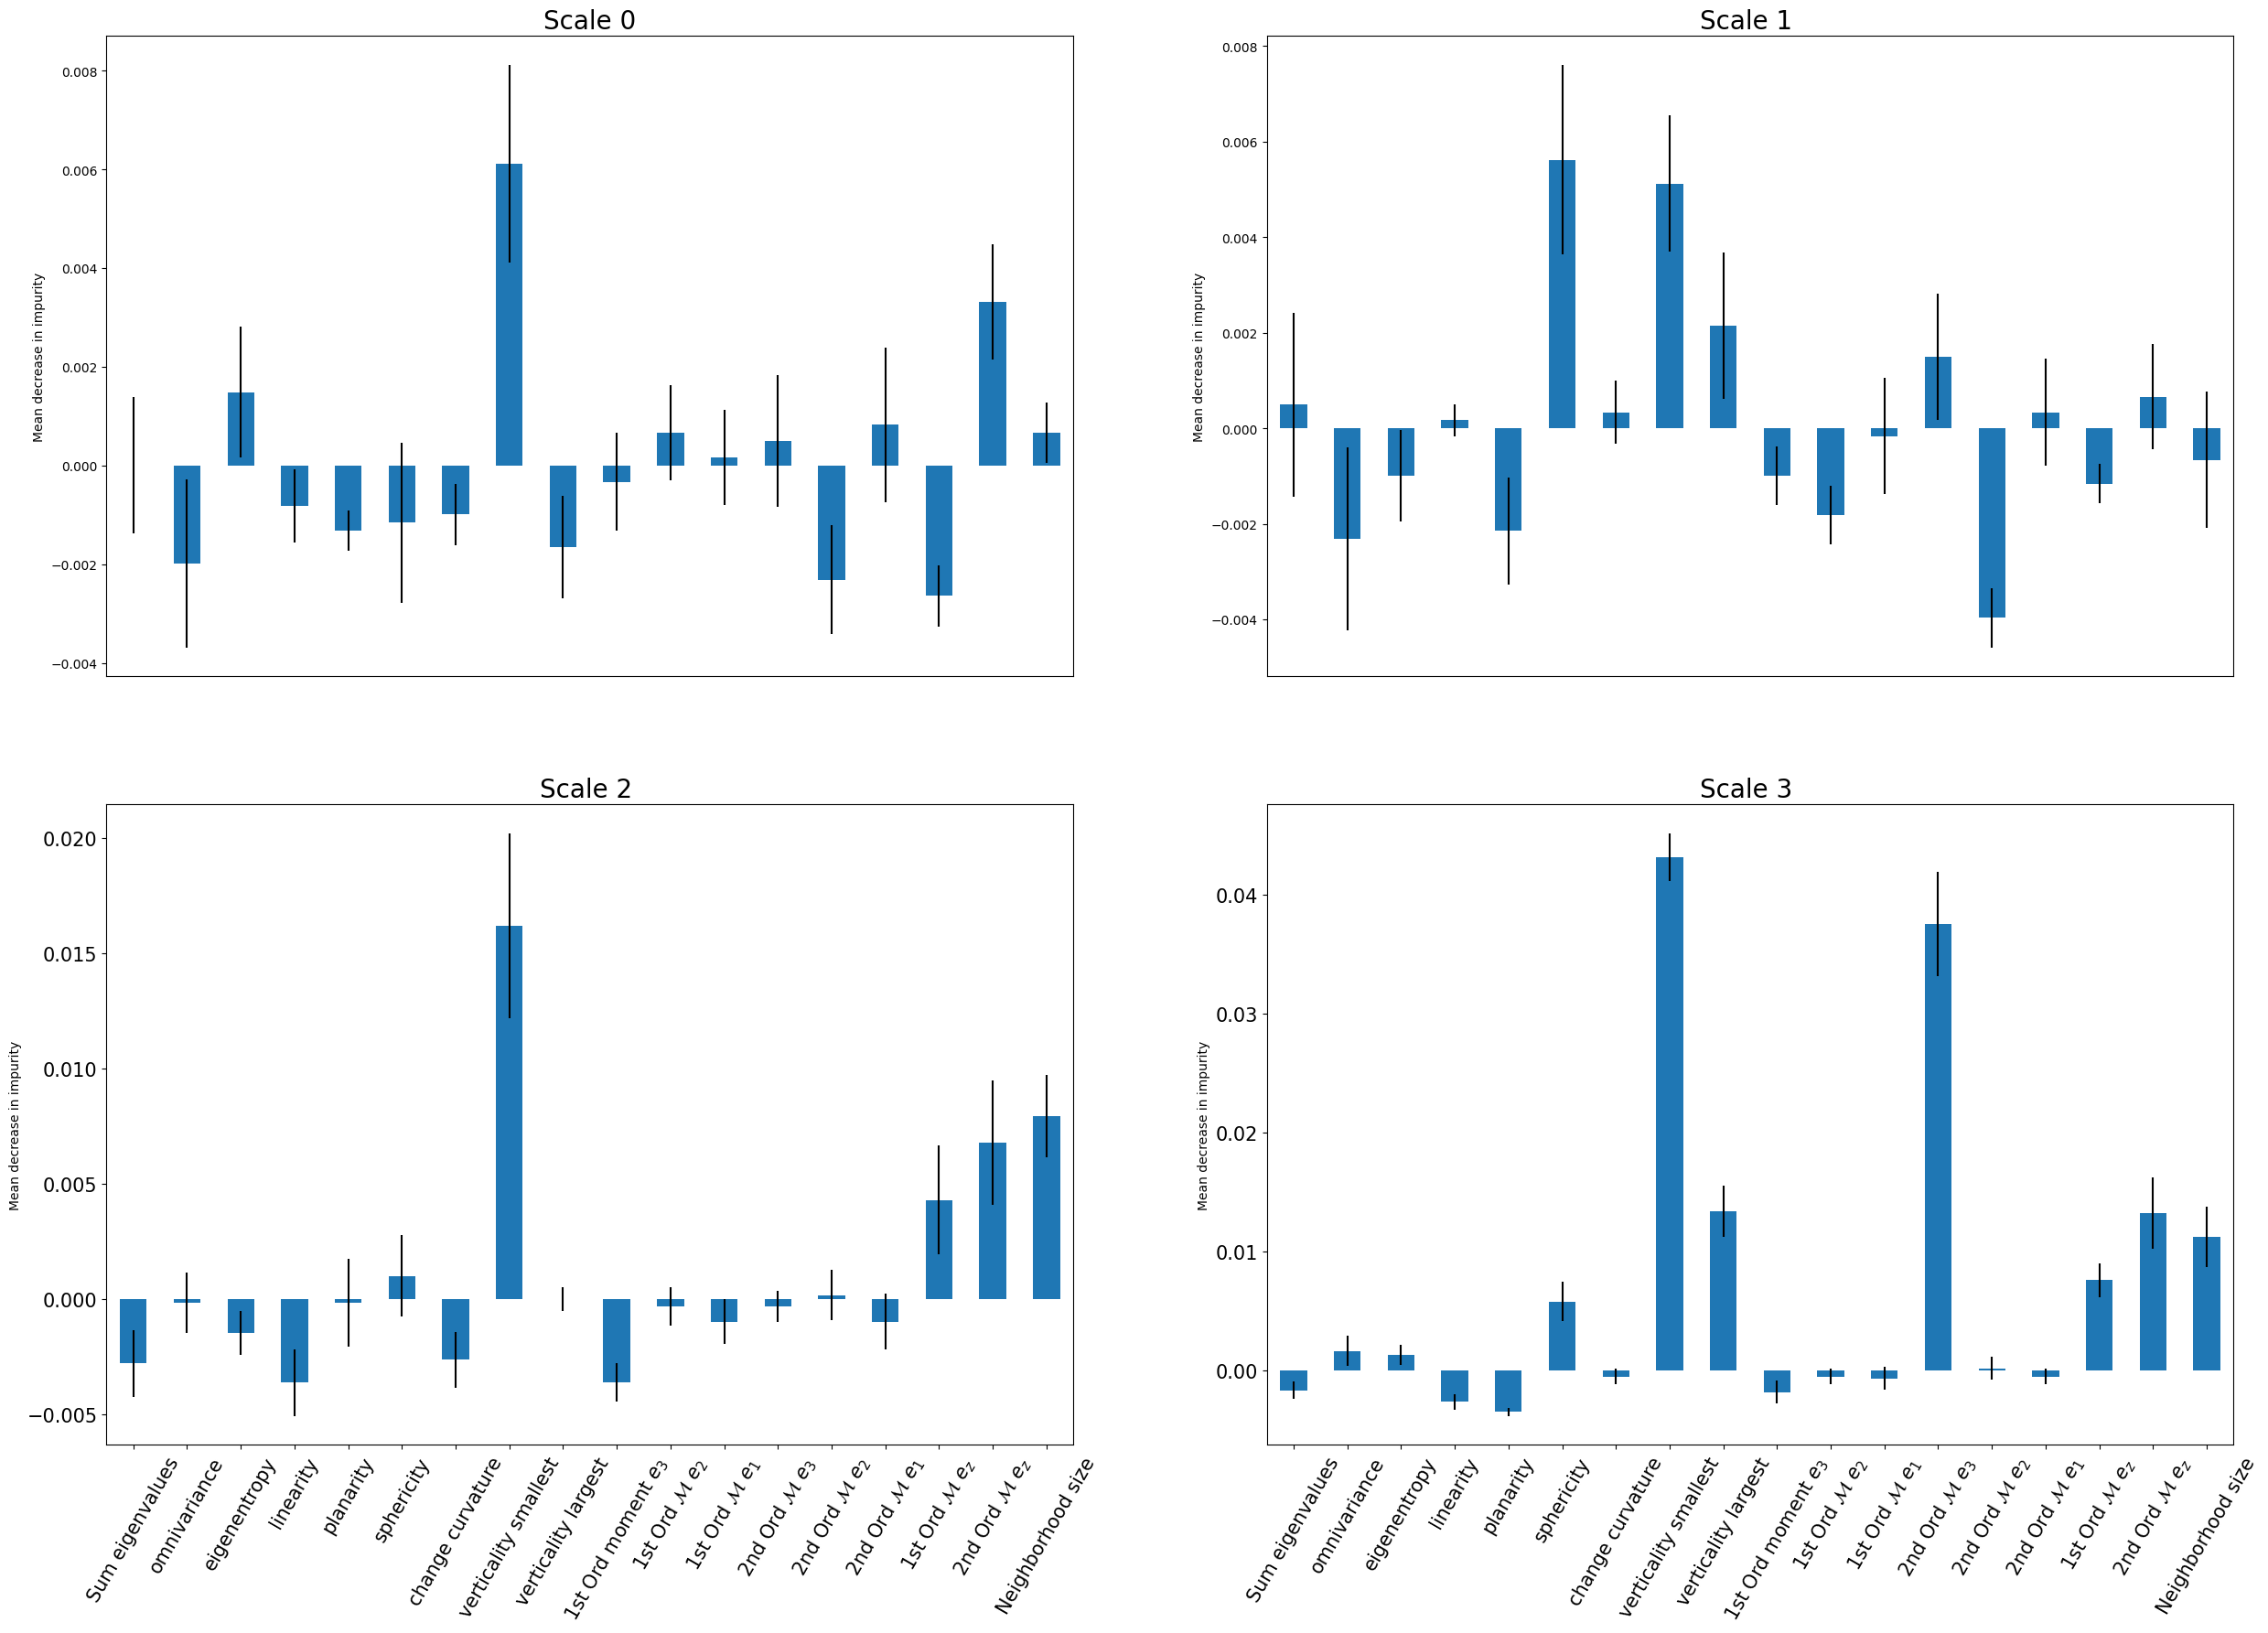

In [73]:
t0 = time.time()
result_DEFAULT = permutation_importance(
    classifier, val_features_DEFAULT, val_labels, 
    n_repeats=5, 
    random_state=42,
    n_jobs=-1 # Number of jobs to run in parallel. The computation is done by computing permutation score for each columns and parallelized over the columns
)
t1 = time.time()
print(f"Time to compute permutation importances: {t1-t0:.2f} seconds")
print(result_DEFAULT.importances_mean.shape)
plot_importance('DEFAULT', result_DEFAULT.importances_mean, result_DEFAULT.importances_std, permutation=True)

Time to compute permutation importances: 17.63 seconds
(84,)


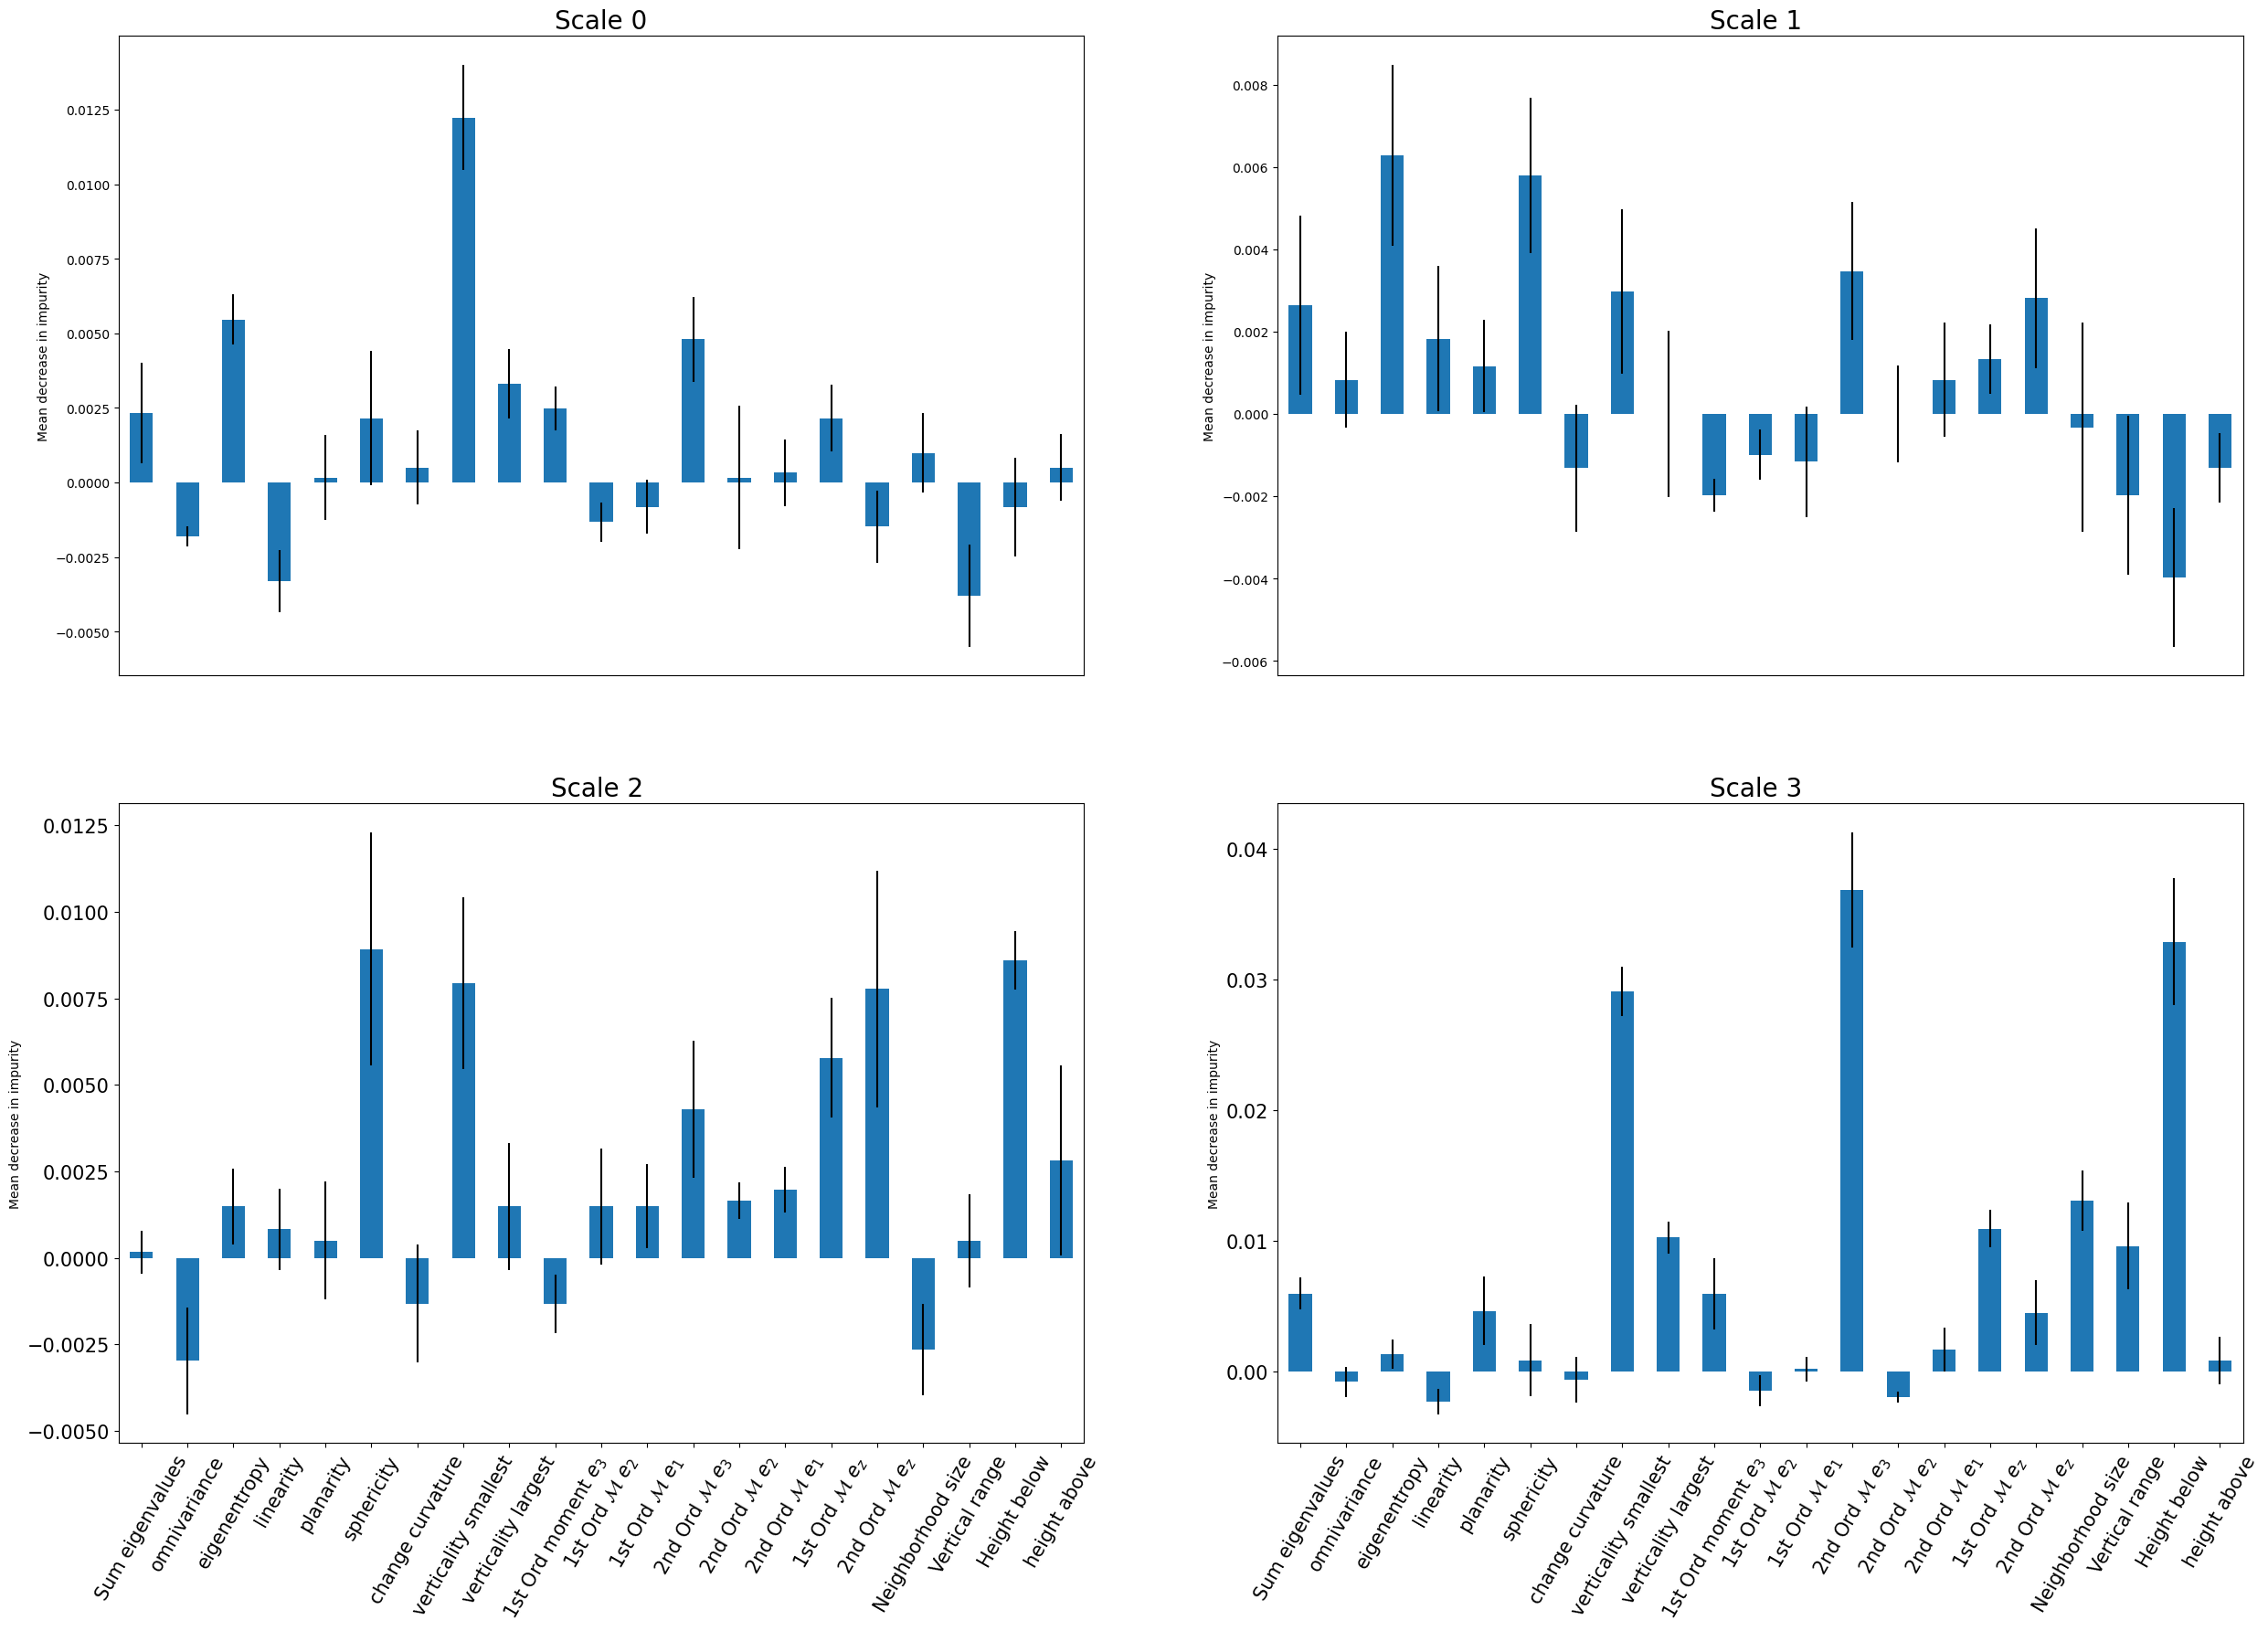

In [74]:
t0 = time.time()
result_wH = permutation_importance(
    classifier_w_height_feat, val_features, val_labels, 
    n_repeats=5, 
    random_state=42,
    n_jobs=-1
)
t1 = time.time()
print(f"Time to compute permutation importances: {t1-t0:.2f} seconds")
print(result_wH.importances_mean.shape)
plot_importance(methodwH, result_wH.importances_mean, result_wH.importances_std, n_feats=21, permutation=True)